**Importing the libraries**

In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *

# Plotting graph for CDD

**Importing the .nc file for checking all the variables,attributes and values**

In [2]:
cdd_data = xr.open_dataset('./CDD_Consecutive_Dry_Days/1998_cdd.nc')
cdd_data

<xarray.Dataset>
Dimensions:                                                     (time: 1,
                                                                 lon: 119,
                                                                 bnds: 2,
                                                                 lat: 117)
Coordinates:
  * time                                                        (time) datetime64[ns] ...
  * lon                                                         (lon) float64 ...
  * lat                                                         (lat) float64 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds                                                    (lon, bnds) float64 ...
    lat_bnds                                                    (lat, bnds) float64 ...
    cddETCCDI                                                   (time, lat, lon) timedelta64[ns] ...
    number_of_cdd_periods_with_more_than_5days_per_time_period  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 01 23:41:45 2023: cdo -O -s -etccdi_cdd 1998_stack....
    CDO:          Climate Data Operators version 2.2.1 (https://mpimet.mpg.de...

**One by one opening all the files using loop and format strings and storing the file inside variable called cdd_data**

**Then we will keep adding the values for variable 'cddETCCDI' of all years till 2019 so we will get sum of all year's consecutive dry days in a list called cdd_values but the values are still in timestamp format we have to convert it into float...**

In [3]:
cdd_values = [[0]]
for i in range(1998,2020):
    path = './CDD_Consecutive_Dry_Days/'
    cdd_data = xr.open_dataset(f'{path+str(i)}_cdd.nc')
    print(cdd_data['cddETCCDI'].values[0])
    cdd_values = cdd_values + cdd_data['cddETCCDI'].values[0]
cdd_values

[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' '

array([['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ...,
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT']],
      dtype='timedelta64[ns]')

**Filling all the NaT values with 0 (for using the fillna() function we have to convert it into a dataframe first)**

In [4]:
cdd_values = pd.DataFrame(cdd_values).fillna(0)
cdd_values

0   1   2   3   4   5   6   7   8   9    ... 109 110 111 112 113 114 115  \
0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
112   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
113   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
114   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
115   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
116   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    116 117 118  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
112   0   0   0  
113   0   0   0  
114   0   0   0  
115   0   0   0  
116   0   0   0  

[117 rows x 119 columns]

In [5]:
cdd_values.values.shape

(117, 119)

**Now , we have the cdd_values ready in floating number but we have to take mean of all the values , to do this we can divide each value by 22(as we have 22 years of data available) also we need to provide the data in list of lists format in for which we will iterate through all the values in cdd_values and divide it by 22 (the values are in timestamp format which is as 247 days 00:00 so we need to split it with a space first and then convert 247 to float and divide it with 22)**

**now for each value we will append it to the temporary list and once all values in one rows have been divided by 22 , we will append this list to another list(bcoz we have to provide values as a list of [117,119]) and finally will pass the list d_point to the heatmap**

In [6]:
d_points = []
temp_points = []

for i in cdd_values.values:
    temp_points=[]
    for j in i:
        if(j!=0):
            j = float(str(j).split(" ")[0])/22
        else:
            j = np.NaN
            # print(j)
        temp_points.append(j)
    d_points.append(temp_points)
d_points

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

In [2]:
lat = np.arange(0,120,5)
lat

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115])

Text(0.5, 1.0, 'Consecutive Dry Days for 1998-2019')

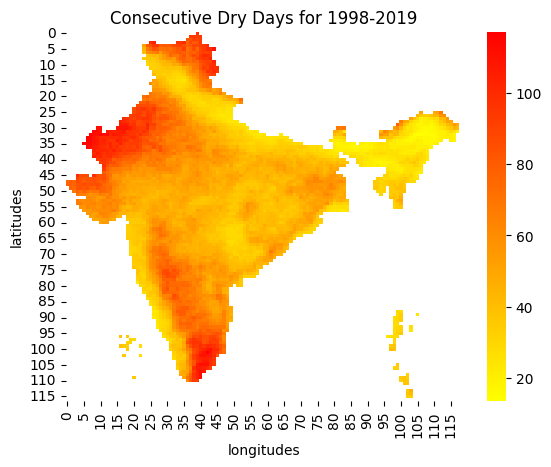

In [8]:
sns.heatmap(d_points[::-1],cmap='autumn_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
# plt.xticks(lat)
plt.title('Consecutive Dry Days for 1998-2019')
# cmap = autumn_r

In [24]:
cdd_data['cddETCCDI'].values = [d_points]

In [30]:
for i in cdd_data['cddETCCDI'].values:
    for j in i:
        print(j)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.

In [31]:
cdd_data.to_netcdf('./CDD_Consecutive_Dry_Days/ALL_Years_CDD.nc')

# Plotting graph for CWD

In [32]:
cwd_data = xr.open_dataset('./CWD_Consecutive_Wet_Days/1998_cwd.nc')
cwd_data

<xarray.Dataset>
Dimensions:                                                     (time: 1,
                                                                 lon: 119,
                                                                 bnds: 2,
                                                                 lat: 117)
Coordinates:
  * time                                                        (time) datetime64[ns] ...
  * lon                                                         (lon) float64 ...
  * lat                                                         (lat) float64 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds                                                    (lon, bnds) float64 ...
    lat_bnds                                                    (lat, bnds) float64 ...
    cwdETCCDI                                                   (time, lat, lon) timedelta64[ns] ...
    number_of_cwd_periods_with_more_than_5days_per_time_period  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 01 23:42:33 2023: cdo -O -s -etccdi_cwd 1998_stack....
    CDO:          Climate Data Operators version 2.2.1 (https://mpimet.mpg.de...

In [3]:
cwd_values = [[0]]
for i in range(1998,2020):
    path = './CWD_Consecutive_Wet_Days/'
    cwd_data = xr.open_dataset(f'{path+str(i)}_cwd.nc')
    print(cwd_data['cwdETCCDI'].values[0])
    cwd_values = cwd_values + cwd_data['cwdETCCDI'].values[0]
cwd_values

[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' '

array([['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ...,
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT']],
      dtype='timedelta64[ns]')

In [4]:
cwd_values = pd.DataFrame(cwd_values).fillna(0)
cwd_values

0   1   2   3   4   5   6   7   8   9    ... 109 110 111 112 113 114 115  \
0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
112   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
113   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
114   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
115   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
116   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    116 117 118  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
112   0   0   0  
113   0   0   0  
114   0   0   0  
115   0   0   0  
116   0   0   0  

[117 rows x 119 columns]

In [5]:
d_points_cwd = []
temp_points_cwd = []

for i in cwd_values.values:
    temp_points_cwd=[]
    for j in i:
        if(j!=0):
            j = float(str(j).split(" ")[0])/22
        else:
            j = np.NaN
        temp_points_cwd.append(j)
    d_points_cwd.append(temp_points_cwd)
d_points_cwd

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'Consecutive Wet Days for 1998-2019')

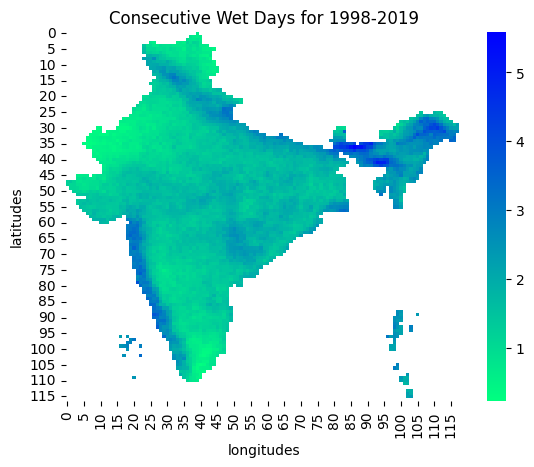

In [77]:
sns.heatmap(d_points_cwd[::-1],cmap='winter_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('Consecutive Wet Days for 1998-2019')
# cmap = winter_r

In [6]:
cwd_data['cwdETCCDI'].values = [d_points_cwd]
cwd_data['cwdETCCDI'].values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [7]:
cwd_data.to_netcdf('./CWD_Consecutive_Wet_Days/ALL_Years_CWD.nc')

# Plotting Heavy Precipitation Days (ECA_r10mm) Graph

In [11]:
eca_r10mm = xr.open_dataset('./ECA_r10MM_HEAVY_PRECIPITATION/1998_ecar10mm_output.nc')
eca_r10mm['heavy_precipitation_days_index_per_time_period'].values[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [13]:
for i in eca_r10mm['heavy_precipitation_days_index_per_time_period'].values[0]:
    for j in i:
        print(j)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [34]:
eca_r10mm_values = [[0]]
for i in range(1998,2020):
    path = './ECA_r10MM_HEAVY_PRECIPITATION/'
    eca_r10mm = xr.open_dataset(f'{path+str(i)}_ecar10mm_output.nc')
    print(eca_r10mm['heavy_precipitation_days_index_per_time_period'].values[0])
    eca_r10mm_values = eca_r10mm_values + eca_r10mm['heavy_precipitation_days_index_per_time_period'].values[0]
eca_r10mm_values

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [35]:
eca_r10mm_values = pd.DataFrame(eca_r10mm_values).fillna(-1)
eca_r10mm_values

0    1    2    3    4    5    6    7    8    9    ...  109  110  111  \
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   

     112  113  114  115  116  117  118  
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
..   ...  ...  ...  ...  ...  ...  ...  
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[117 rows x 119 columns]

In [36]:
d_points_eca_10 = []
temp_points_eca_10 = []

for i in eca_r10mm_values.values:
    temp_points_eca_10=[]
    for j in i:
        if(j!=-1):
            j = j/22
        else:
            j = np.NaN
        temp_points_eca_10.append(j)
    d_points_eca_10.append(temp_points_eca_10)
d_points_eca_10

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'heavy precipitation days for 1998-2019')

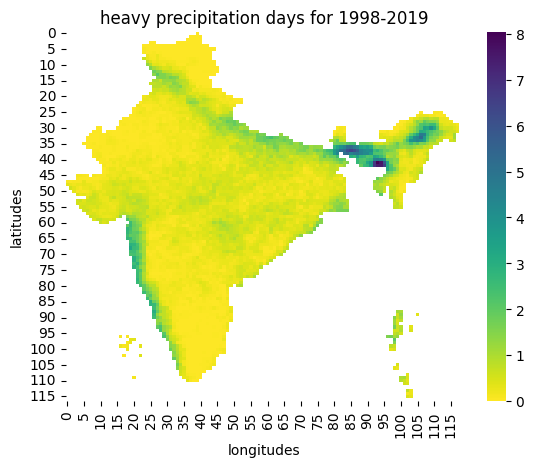

In [38]:
sns.heatmap(d_points_eca_10[::-1],cmap='viridis_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('heavy precipitation days for 1998-2019')
# cmap = winter_r

# Plotting Graph for Very Heavy Precipitation Days (eca_r20mm)

In [41]:
eca_r20mm = xr.open_dataset('./ECA_R20MM_VERY_HEAVY_PRECIPITATION/1998_eca_r20mm_stack.nc')
eca_r20mm['very_heavy_precipitation_days_index_per_time_period'].values[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [42]:
eca_r20mm_values = [[0]]
for i in range(1998,2020):
    path = './ECA_R20MM_VERY_HEAVY_PRECIPITATION/'
    eca_r20mm = xr.open_dataset(f'{path+str(i)}_eca_r20mm_stack.nc')
    print(eca_r20mm['very_heavy_precipitation_days_index_per_time_period'].values[0])
    eca_r20mm_values = eca_r20mm_values + eca_r20mm['very_heavy_precipitation_days_index_per_time_period'].values[0]
eca_r20mm_values

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [43]:
eca_r20mm_values = pd.DataFrame(eca_r20mm_values).fillna(-1)
eca_r20mm_values

0    1    2    3    4    5    6    7    8    9    ...  109  110  111  \
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   

     112  113  114  115  116  117  118  
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
..   ...  ...  ...  ...  ...  ...  ...  
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[117 rows x 119 columns]

In [44]:
d_points_eca_20 = []
temp_points_eca_20 = []

for i in eca_r20mm_values.values:
    temp_points_eca_20=[]
    for j in i:
        if(j!=-1):
            j = j/22
        else:
            j = np.NaN
        temp_points_eca_20.append(j)
    d_points_eca_20.append(temp_points_eca_20)
d_points_eca_20

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'very heavy precipitation days for 1998-2019')

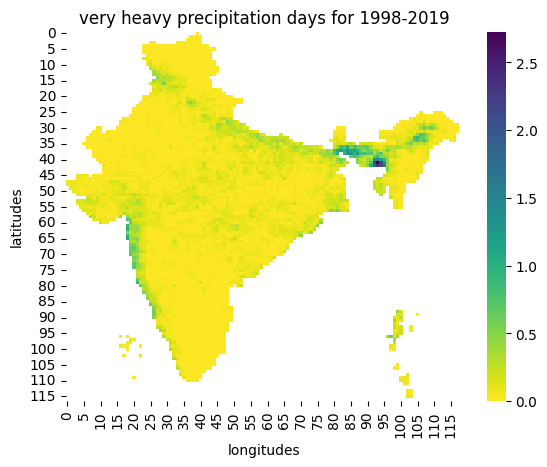

In [45]:
sns.heatmap(d_points_eca_20[::-1],cmap='viridis_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('very heavy precipitation days for 1998-2019')
# cmap = winter_r

# Plotting Graph for Maximum 1 Day Precipitation rx1day

In [3]:
CDO = Cdo()

In [4]:
op_path = "./simple_daily_sdii/"
in_path = './A_Stack_Yearwise/'
for i in range(1998,2020):
    print(f'{in_path}{i}_stack.nc')
    CDO.eca_sdii(input=f'{in_path}{i}_stack.nc',output=f'{op_path}{i}_sdii.nc')

./A_Stack_Yearwise/1998_stack.nc
./A_Stack_Yearwise/1999_stack.nc
./A_Stack_Yearwise/2000_stack.nc
./A_Stack_Yearwise/2001_stack.nc
./A_Stack_Yearwise/2002_stack.nc
./A_Stack_Yearwise/2003_stack.nc
./A_Stack_Yearwise/2004_stack.nc
./A_Stack_Yearwise/2005_stack.nc
./A_Stack_Yearwise/2006_stack.nc
./A_Stack_Yearwise/2007_stack.nc
./A_Stack_Yearwise/2008_stack.nc
./A_Stack_Yearwise/2009_stack.nc
./A_Stack_Yearwise/2010_stack.nc
./A_Stack_Yearwise/2011_stack.nc
./A_Stack_Yearwise/2012_stack.nc
./A_Stack_Yearwise/2013_stack.nc
./A_Stack_Yearwise/2014_stack.nc
./A_Stack_Yearwise/2015_stack.nc
./A_Stack_Yearwise/2016_stack.nc
./A_Stack_Yearwise/2017_stack.nc
./A_Stack_Yearwise/2018_stack.nc
./A_Stack_Yearwise/2019_stack.nc


In [3]:
rx_1_day = xr.open_dataset('./RX_1day/1998_rx1day.nc')
rx_1_day['rx1dayETCCDI'].values[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [4]:
rx_1_day_values = [[0]]
for i in range(1998,2020):
    path = './RX_1day/'
    rx_1_day = xr.open_dataset(f'{path+str(i)}_rx1day.nc')
    print(rx_1_day['rx1dayETCCDI'].values[0])
    rx_1_day_values = rx_1_day_values + rx_1_day['rx1dayETCCDI'].values[0]
rx_1_day_values

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [5]:
rx_1_day_values = pd.DataFrame(rx_1_day_values).fillna(-1)
rx_1_day_values

0    1    2    3    4    5    6    7    8    9    ...  109  110  111  \
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   

     112  113  114  115  116  117  118  
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
..   ...  ...  ...  ...  ...  ...  ...  
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[117 rows x 119 columns]

In [6]:
d_points_rx1day = []
temp_points_rx1day = []

for i in rx_1_day_values.values:
    temp_points_rx1day=[]
    for j in i:
        if(j!=-1):
            j = j/22
        else:
            j = np.NaN
        temp_points_rx1day.append(j)
    d_points_rx1day.append(temp_points_rx1day)
d_points_rx1day

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'Maximum 1 Day Precipitation for 1998-2019')

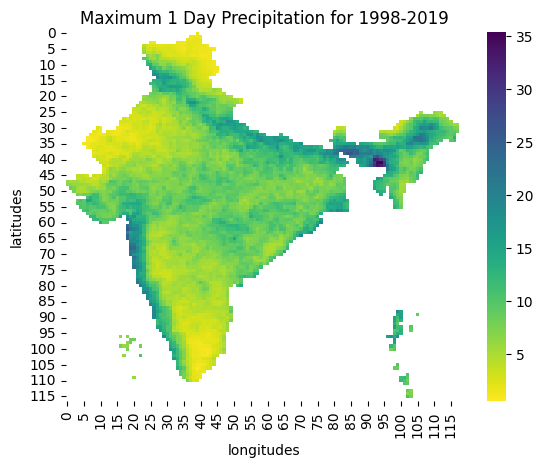

In [131]:
sns.heatmap(d_points_rx1day[::-1],cmap='viridis_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('Maximum 1 Day Precipitation for 1998-2019')
# cmap = winter_r

# Plotting Graph for Maximum 5 Days Precipitation rx5day

In [8]:
rx_5_day_values = [[0]]
for i in range(1998,2020):
    path = './RX_5day/'
    rx_5_day = xr.open_dataset(f'{path+str(i)}_rx5day.nc')
    print(rx_5_day['rx5dayETCCDI'].values[0])
    rx_5_day_values = rx_5_day_values + rx_5_day['rx5dayETCCDI'].values[0]
rx_5_day_values

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [9]:
rx_5_day_values = pd.DataFrame(rx_5_day_values).fillna(-1)
rx_5_day_values

0    1    2    3    4    5    6    7    8    9    ...  109  110  111  \
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0 -1.0   

     112  113  114  115  116  117  118  
0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
..   ...  ...  ...  ...  ...  ...  ...  
112 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
113 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
114 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
115 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
116 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[117 rows x 119 columns]

In [10]:
d_points_rx5day = []
temp_points_rx5day = []

for i in rx_5_day_values.values:
    temp_points_rx5day=[]
    for j in i:
        if(j!=-1):
            j = j/22
        else:
            j = np.NaN
        temp_points_rx5day.append(j)
    d_points_rx5day.append(temp_points_rx5day)
d_points_rx5day

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'Maximum 5 Days Precipitation for 1998-2019')

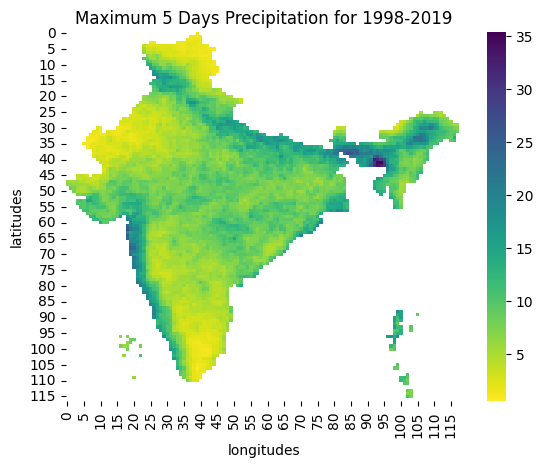

In [11]:
sns.heatmap(d_points_rx5day[::-1],cmap='viridis_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('Maximum 5 Days Precipitation for 1998-2019')

**analysis of different years grapg over the indice cdd**

In [76]:
cdd_values = [] # for storing values of cdd over different years
years = []
path = './CDD_Consecutive_Dry_Days/'
for i in range(1998,2020):
    years.append(i)
    temp_cdd_val = xr.open_dataset(f'{path+str(i)}_cdd.nc')
    cdd_values.append(temp_cdd_val['cddETCCDI'].values[0])
len(cdd_values)

22

In [106]:
j = 0
values = []
ar = []
yearwise_val = []
for i in cdd_values:
    ar = []
    for j in i:
        values=[]
        for k in j:
            # print(k)
            if(str(k)=='NaT'):
                k = 0
            else:
                k = float(str(k).split(" ")[0])/8.64e+13
            # print(k)
            values.append(k)
        ar.append(values)
    yearwise_val.append(ar)       
yearwise_val

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   

In [95]:
len(yearwise_val)

22

In [108]:
val = []
for i in yearwise_val:
    val.append(pd.DataFrame(i).mean())
    # print(pd.DataFrame(i).mean())

In [117]:
value = 0
cdd_values_each_year = []
for i in val:
    value=0
    for j in i:
       value = value + j 
    cdd_values_each_year.append(value/119)
cdd_values_each_year

[17.1445809092868,
 19.0542268189327,
 18.144149967679382,
 18.216332686920914,
 19.536163183222012,
 16.710479063420248,
 17.738562091503272,
 17.39883645765999,
 17.11405587876176,
 16.66946778711485,
 18.39862098685628,
 20.55835667600373,
 16.70695970695971,
 17.489549666020256,
 18.073762838468724,
 18.482798247504128,
 19.3052503052503,
 17.61179343532285,
 18.26064784888314,
 18.60497019320549,
 17.930043812396743,
 17.26811750341162]

In [118]:
print(years)
print(cdd_values_each_year)

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[17.1445809092868, 19.0542268189327, 18.144149967679382, 18.216332686920914, 19.536163183222012, 16.710479063420248, 17.738562091503272, 17.39883645765999, 17.11405587876176, 16.66946778711485, 18.39862098685628, 20.55835667600373, 16.70695970695971, 17.489549666020256, 18.073762838468724, 18.482798247504128, 19.3052503052503, 17.61179343532285, 18.26064784888314, 18.60497019320549, 17.930043812396743, 17.26811750341162]


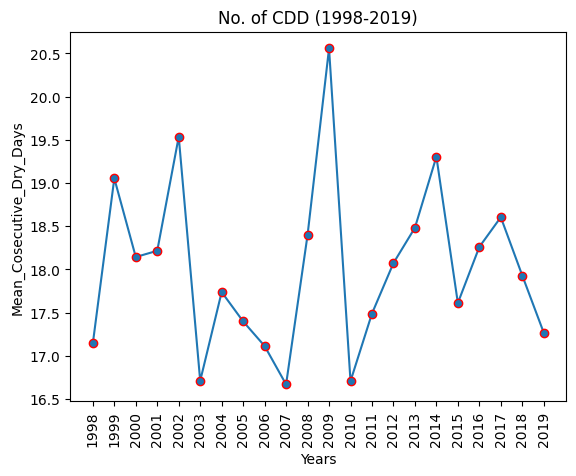

In [129]:
plt.plot(years,cdd_values_each_year,marker="o",markeredgecolor="r")
plt.xlabel('Years')
plt.ylabel('Mean_Cosecutive_Dry_Days')
plt.title('No. of CDD (1998-2019)')
plt.xticks(years,rotation=90)
# plt.yticks(cdd_values_each_year)
plt.show()